In [1]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
import os
from dotenv import load_dotenv


In [2]:
df = pd.read_excel(r"./input_Files/GDP.xls")
print(df)


    Countries  Ranking      country_Name  Economy in US_dollars
0         USA        1     United States           2.546270e+07
1         CHN        2             China           1.796317e+07
2         JPN        3             Japan           4.231141e+06
3         DEU        4           Germany           4.072192e+06
4         IND        5             India           3.385090e+06
..        ...      ...               ...                    ...
204       MHL      205  Marshall Islands           2.796679e+02
205       KIR      206          Kiribati           2.233529e+02
206       PLW      207             Palau           2.178000e+02
207       NRU      208             Nauru           1.509222e+02
208       TUV      209            Tuvalu           6.034939e+01

[209 rows x 4 columns]


In [3]:
load_dotenv()  # take environment variables from .env.

llm = OpenAI(api_token=os.getenv("OPENAI_API_KEY"), model_name="gpt-3.5-turbo-instruct")

### NOW I USE SmartDataFrame 


In [4]:
sdf = SmartDataframe(df, config={"llm": llm},name="GDP list", description="This is GDP list corresponding to different countries")  

#we can add the custom prompts as in config you can add: ==> : 
# df = SmartDataframe("data.csv", config={
#     "custom_prompts": {
#         "generate_python_code": MyCustomFileBasedPrompt(
#             my_custom_value="my custom value")
#     }
# })
# we can refer documentation from detail..


In [5]:
print(sdf)


    Countries  Ranking      country_Name  Economy in US_dollars
0         USA        1     United States           2.546270e+07
1         CHN        2             China           1.796317e+07
2         JPN        3             Japan           4.231141e+06
3         DEU        4           Germany           4.072192e+06
4         IND        5             India           3.385090e+06
..        ...      ...               ...                    ...
204       MHL      205  Marshall Islands           2.796679e+02
205       KIR      206          Kiribati           2.233529e+02
206       PLW      207             Palau           2.178000e+02
207       NRU      208             Nauru           1.509222e+02
208       TUV      209            Tuvalu           6.034939e+01

[209 rows x 4 columns]


##### cache folder is made so we can disable it also as we studied in documentation

refer documentation here : "https://docs.pandas-ai.com/en/latest/cache/"

In [6]:
sdf.chat('what is country name which has top economies in the list')

'The country with the top economy is United States.'

In [7]:
print(sdf.last_code_generated)

gdp_list = dfs[0]
top_country = gdp_list.loc[gdp_list['Ranking'] == 1, 'country_Name'].values[0]
result = {'type': 'string', 'value': f'The country with the top economy is {top_country}.'}


### AGENTS: 

In [8]:
from pandasai import Agent
from pandasai.skills import skill
import streamlit as st



In [9]:

# Function doc string to give more context to the model for use this skill
@skill
def plot_USDollarValues(country_Name: list[str], US_dollars: list[int]):
    """
    Displays the bar chart  having name on x-axis and salaries on y-axis
    Args:
        names (list[str]): Employees' names
        salaries (list[int]): Salaries
    """
    # plot bars
    import matplotlib.pyplot as plt

    plt.bar(country_Name, US_dollars)
    plt.xlabel("Countries Name")
    plt.ylabel("US_Dollars")
    plt.title("GDP of the countries")
    plt.xticks(rotation=45)
    plt.savefig("temp_chart.png")
    fig = plt.gcf()
    st.pyplot(fig)




agent = Agent([df], config={"llm": llm})

agent.add_skills(plot_USDollarValues)



In [12]:
agent.chat("name the countries whos gdp is greater than average in tabular format")

,Country Name
0,United States
1,China
2,Japan
3,Germany
4,India
5,United Kingdom
6,France
7,Russian Federation
8,Canada
9,Italy


In [8]:
# response = agent.chat('name top five countries in the list having maximum GDP')
# explanation = agent.explain()

# print("The answer is", response)
# print("The explanation is", explanation)

agent.chat('name top five countries in the list having maximum GDP')


['United States', 'China', 'Japan', 'Germany', 'India']

In [9]:
# response = agent.chat("and what is there US Dollar Value")
# explanation = agent.explain()

agent.chat("and what is there US Dollar Value")


,country_Name,Economy in US_dollars
0,United States,2.546270e+07
1,China,1.796317e+07
2,Japan,4.231141e+06
3,Germany,4.072192e+06
4,India,3.385090e+06


2024-01-23 17:51:25.540 
  command:

    streamlit run c:\Users\Lenovo\Desktop\CSV_Reader_ChatBOT\venv310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


,country_Name,Economy in US_dollars
0,United States,2.546270e+07
1,China,1.796317e+07
2,Japan,4.231141e+06
3,Germany,4.072192e+06
4,India,3.385090e+06


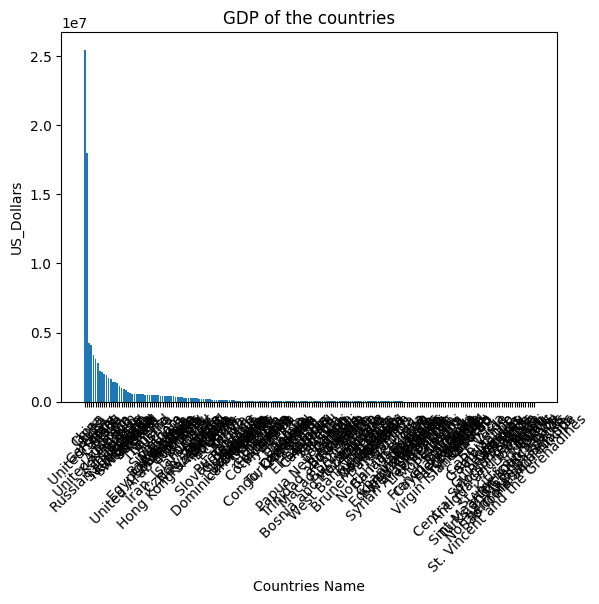

In [12]:
agent.chat("can you please plot the graph b/w countries v/s US Dollar")


In [11]:
agent.chat("can you please give me the name of only first 3 countries with their economy values")

'The top three countries with their economy values are: United States, China, Japan with economy values 25462700.0, 17963170.5210798, 4231141.20186317.'

In [12]:
agent.chat("give in tabular format")

'The top three countries with their economy values are: United States, China, Japan with economy values 25462700.0, 17963170.5210798, 4231141.20186317.'